In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
data=pd.read_csv("C:/Users/lenovo/Downloads/Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


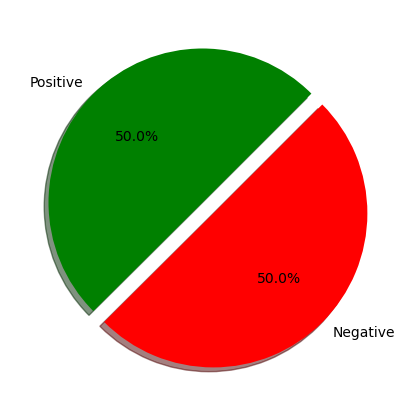

In [18]:
fig=plt.figure(figsize=(5,5))
colors=["green",'red']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [28]:
import re

def preprocessor(text):
    """Preprocesses text by removing HTML tags, converting emojis to text, and cleaning punctuation."""

    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)

    # Convert emojis to text
    emojis = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub(r'[\W]+', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    return text

# Assuming you have a DataFrame named 'data' with a 'text' column
data['text'] = data['text'].apply(preprocessor)

In [24]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [34]:
data.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [38]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/301.4 kB 330.3 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.4 kB 459.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 504.4 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/301.4 kB 614.4 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.4 kB 620.6 kB/s eta 0:00:01
   ---------------------------------- --- 276.5/301.4 kB 741.6 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 746.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install stopwords

Note: you may need to restart the kernel to use updated packages.


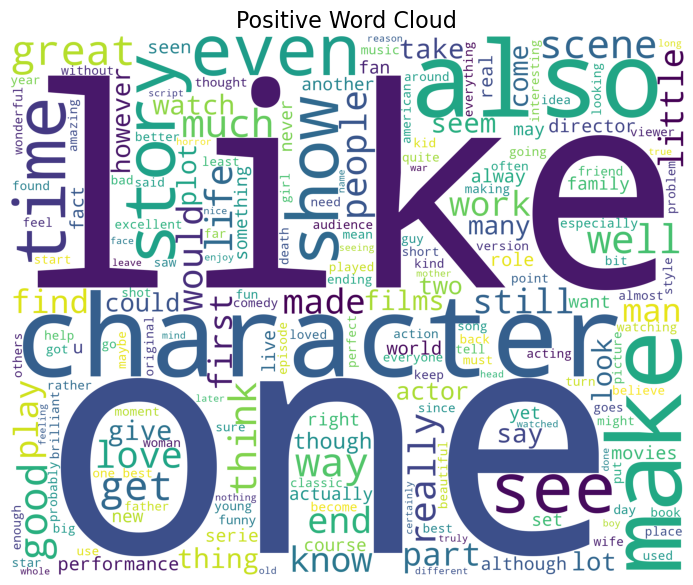

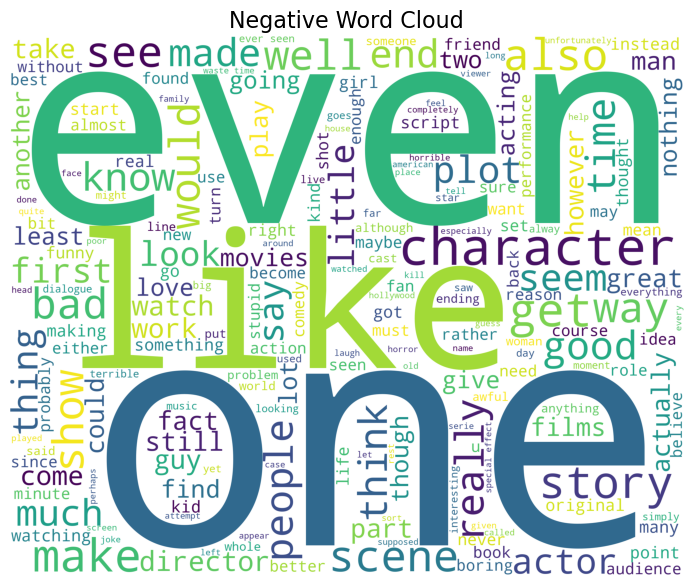

In [48]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt  # Import for plotting

# Download stopwords if not already done
nltk.download('stopwords', quiet=True)  # Download silently

# Get stopwords for English
stop = stopwords.words('english')

# Filter positive and negative data
positivedata = data[data['label'] == 1]
negdata = data[data['label'] == 0]

# Function to generate and display a word cloud
def wordcloud_draw(data, label, color='white'):
    text = ' '.join(data['text'])  # Combine all text for word cloud
    cleaned_text = " ".join([word for word in text.split()
                             if (word not in stop and  # Remove stopwords
                                 word != 'movie' and word != 'film')])  # Remove specific words

    wordcloud = WordCloud(stopwords=stop,
                           background_color=color,
                           width=2500,
                           height=2000
                           ).generate(cleaned_text)

    plt.figure(figsize=(10, 7))  # Set figure size
    plt.imshow(wordcloud)
    plt.title(f"{label} Word Cloud", fontsize=16)  # Add title with label
    plt.axis('off')
    plt.show()

# Generate word clouds for positive and negative data
wordcloud_draw(positivedata, "Positive")
wordcloud_draw(negdata, "Negative")

In [59]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                       tokenizer=tokenizer_porter, token_pattern=None,
                       use_idf=True, norm='l2', smooth_idf=True)

y = data.label.values
x = tfidf.fit_transform(data.text)

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [63]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   10.8s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   10.9s finished


Accuracy: 0.8911
